<a href="https://colab.research.google.com/github/amalMalqahtani/Week5/blob/main/Another_copy_of_Task_2_Convolutional_Neural_Networks_(CNN)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [ ]:
#!kaggle datasets download -d khaledzsa/parkinglot-occupation
#!unzip parkinglot-occupation.zip

## Import Libraries

In [ ]:
#inputs = keras.Input(shape=(None, None, 3))
#processed = keras.layers.RandomCrop(width=128, height=128)(inputs)
#conv = keras.layers.Conv2D(filters=32, kernel_size=3)(processed)
#pooling = keras.layers.GlobalAveragePooling2D()(conv)
#feature = keras.layers.Dense(10)(pooling)

#full_model = keras.Model(inputs, feature)
#backbone = keras.Model(processed, conv)
#activations = keras.Model(conv, feature)


In [ ]:
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from keras.layers import Input
from keras import ops
import pandas as pd
import seaborn as sns
import os
from keras.models import Model
import numpy as np
from keras import layers
from keras import activations
import keras
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input

In [ ]:
#!unzip -q /content/parkinglot-occupation.zip
!ls

ParkingLot_Occupation  parkinglot-occupation.zip  sample_data


In [ ]:
IMAGE_SIZE = (299, 299)

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [ ]:
 # 3. Split into training and validation sets
  #  train_size = int(len(df) * train_size)

  #  training_data = {
 #       img_name: caption_data[img_name] for img_name in all_images[:train_size]  }
  #  validation_data = {
   #     img_name: caption_data[img_name] for img_name in all_images[train_size:]  }

    # 4. Return the splits
#    return training_data, validation_data

In [ ]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt


In [ ]:
image_size = (180, 180)
batch_size = 128

In [ ]:
train_ds, val_ds = keras.utils.image_dataset_from_directory("/content/ParkingLot_Occupation",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,)

Found 1726 files belonging to 2 classes.
Using 1381 files for training.
Using 345 files for validation.


In [ ]:
num_skipped = 0
for folder_name in ("empty", "occupied"):
    folder_path = os.path.join("img", folder_name)
    for fname in os.listdir("/content/ParkingLot_Occupation"):
        fpath = os.path.join(folder_path, fname)

In [ ]:
print(f"Deleted {num_skipped} images.")

Deleted 0 images.


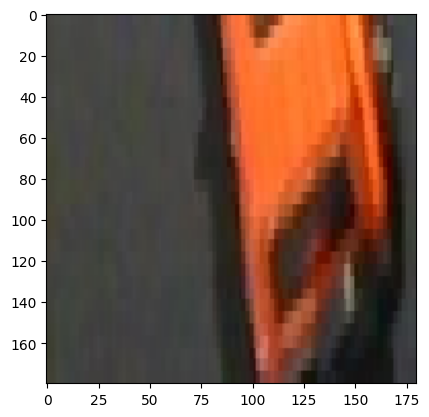

In [ ]:
img = keras.utils.load_img("ParkingLot_Occupation/test/occupied/roi_057a5738ddb945019c790907275e7fb0_occupied.jpg", target_size=image_size)
plt.imshow(img)

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [ ]:
model.add(layers.Dense(64, activation=activations.relu))

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.summary()


In [ ]:

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

model.summary()

#pooling.
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(10))


In [ ]:
keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [ ]:
def train_model(train_data: tf.data.Dataset, test_data: tf.data.Dataset) -> dict:
    model = keras.Sequential(
        [
            layers.Conv2D(32, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Conv2D(32, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Conv2D(32, (3, 3), activation="relu"),
            layers.GlobalAveragePooling2D(),
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.2),
            layers.Dense(10, activation="softmax"),
        ]
    )

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )


    history = model.fit(train_data, epochs=2, validation_data=test_data)

    print(f"Model accuracy on test data: {model.evaluate(test_data)[1] * 100:.2f}%")

    return history.history

In [ ]:

def prepare_dataset(image, label):

    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, axis=-1)
    image = tf.image.resize(image, (32, 32))

    return image, label


In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])

model.compile(...)
model.fit(...)


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
history = train_model(train_data, test_data)

In [ ]:
# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")


## Save the Model
Save the trained CNN model for submission.

In [ ]:
with open("history.json", "w") as fp:
    json.dump(history, fp)

In [ ]:
Model.save(filepath, overwrite=True, zipped=None, **kwargs)

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: